<a href="https://colab.research.google.com/github/dani90210/PROBABILIDAD/blob/main/Unidad5/PracticaFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Probabilidad y estadistica**
##Unidad5
Decente: Jose Gabriel Rodriguez Rivas

Alumno: Daniel Muñoz Valdez

***Practica FINAL Regresión lineal y correlación***

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
import os

In [48]:
plt.rcParams["figure.figsize"] = (8,5)

In [49]:
def explorar_df(df, nombre="df"):
    print(f"\n--- Exploración: {nombre} ---")
    print("Dimensiones:", df.shape)
    display(df.head())
    display(df.describe())
    print("\nValores faltantes por columna:")
    print(df.isnull().sum())

def histograma_calificaciones(df, nombre="df"):
    plt.figure()
    plt.hist(df['Calificacion'].dropna(), bins=12)
    plt.title(f"Histograma de Calificaciones - {nombre}")
    plt.xlabel("Calificación")
    plt.ylabel("Frecuencia")
    plt.grid(axis='y', alpha=0.3)
    plt.show()

def ajustar_regresion_sklearn(df):
    # X debe ser 2D
    X = df[['HorasEstudio']].values.reshape(-1,1)
    y = df['Calificacion'].values
    model = LinearRegression().fit(X, y)
    pendiente = float(model.coef_[0])
    intercepto = float(model.intercept_)
    r2 = model.score(X, y)
    # Pearson r
    r, p_r = stats.pearsonr(df['HorasEstudio'], df['Calificacion'])
    return {'model': model, 'pendiente': pendiente, 'intercepto': intercepto, 'r2': r2, 'r': r, 'p_r': p_r}

def ajustar_regresion_statsmodels(df):
    X = sm.add_constant(df['HorasEstudio'])  # agrega intercept
    y = df['Calificacion']
    model = sm.OLS(y, X).fit()
    return model

def graficar_scatter_regresion(df, resultado_sklearn, nombre="df"):
    X = df['HorasEstudio'].values
    y = df['Calificacion'].values
    pendiente = resultado_sklearn['pendiente']
    intercepto = resultado_sklearn['intercepto']

In [50]:
def graficar_scatter_regresion(df, resultado, nombre="df"):
    """
    Grafica scatter de HorasEstudio vs Calificacion y la línea de regresión.
    - df: DataFrame que debe contener las columnas 'HorasEstudio' y 'Calificacion'
    - resultado: diccionario con 'pendiente' e 'intercepto' (salida de ajustar_regresion_sklearn)
    - nombre: etiqueta para el título del gráfico
    """
    # Asegurarse de extraer correctamente las variables desde el dataframe
    X = df['HorasEstudio'].values
    y = df['Calificacion'].values

    pendiente = resultado['pendiente']
    intercepto = resultado['intercepto']

    plt.figure()
    plt.scatter(X, y, alpha=0.7)

    # línea de regresión (usar rango de X)
    x_line = np.linspace(X.min(), X.max(), 100)
    y_line = intercepto + pendiente * x_line
    plt.plot(x_line, y_line)

    plt.title(f"Scatter y Línea de Regresión - {nombre}")
    plt.xlabel("Horas de Estudio")
    plt.ylabel("Calificación Final")
    plt.grid(alpha=0.3)
    plt.show()


In [51]:
def resumen_resultados(nombre, res_sklearn, res_sm):
    print(f"\n=== Resultados para {nombre} ===")
    print(f"Pendiente (slope): {res_sklearn['pendiente']:.4f}")
    print(f"Intercepto (const): {res_sklearn['intercepto']:.4f}")
    print(f"R^2 (sklearn): {res_sklearn['r2']:.4f}")
    print(f"Coef. correlación Pearson r: {res_sklearn['r']:.4f} (p = {res_sklearn['p_r']:.4e})")
    print("\nResumen statsmodels (para evaluar significancia):")
    print(res_sm.summary())

In [52]:
files = ['grupo1.csv', 'grupo2.csv', 'grupo3.csv']

In [53]:
for f in files:
    if not os.path.exists(f):
        print(f"Advertencia: no se encontró '{f}' en el directorio actual. Sube el archivo a Colab o ajusta la ruta.")

In [54]:
dfs = {}
for f in files:
    try:
        df = pd.read_csv(f)
        df = df.rename(columns={c: c.strip() for c in df.columns})
        possible_horas = [c for c in df.columns if 'hora' in c.lower() or 'horas' in c.lower()]
        possible_cal = [c for c in df.columns if 'cal' in c.lower() or 'nota' in c.lower() or 'grade' in c.lower()]
        if 'HorasEstudio' not in df.columns and possible_horas:
            df = df.rename(columns={possible_horas[0]:'HorasEstudio'})
        if 'Calificacion' not in df.columns and possible_cal:
            df = df.rename(columns={possible_cal[0]:'Calificacion'})
        df['HorasEstudio'] = pd.to_numeric(df['HorasEstudio'].astype(str).str.replace(',','.'), errors='coerce')
        df['Calificacion'] = pd.to_numeric(df['Calificacion'].astype(str).str.replace(',','.'), errors='coerce')
        df = df.dropna(subset=['HorasEstudio','Calificacion']).reset_index(drop=True)
        dfs[f] = df
    except Exception as e:
        print(f"Error cargando {f}: {e}")


--- Exploración: grupo1 ---
Dimensiones: (50, 2)


,HorasEstudio,Calificacion
0,20.00,75.94
1,15.60,87.48
2,17.91,79.40
3,20.00,73.37
4,20.00,83.75


,HorasEstudio,Calificacion
count,50.000000,50.00000
mean,14.352000,83.78820
std,4.219174,7.83389
min,3.790000,68.46000
25%,12.032500,78.03500
50%,14.600000,84.49000
75%,17.715000,88.09000
max,20.000000,100.00000



Valores faltantes por columna:
HorasEstudio    0
Calificacion    0
dtype: int64


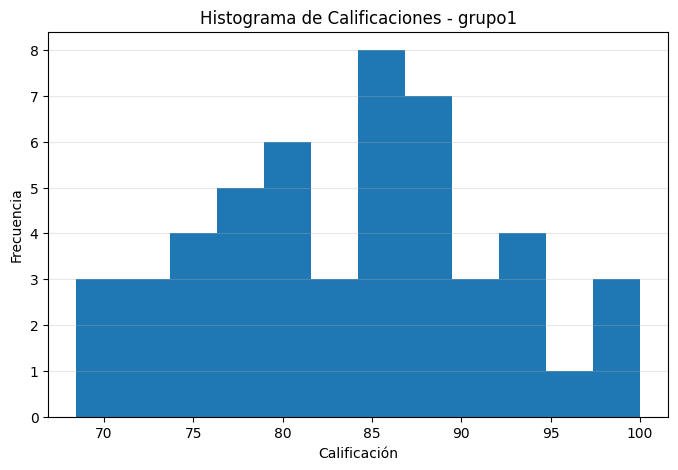

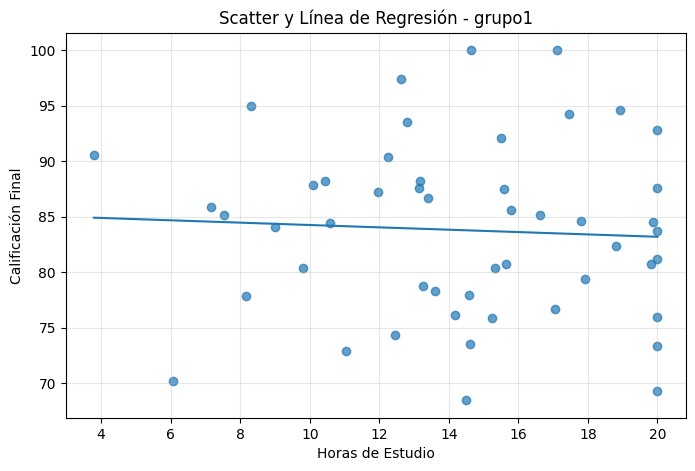


=== Resultados para grupo1 ===
Pendiente (slope): -0.1061
Intercepto (const): 85.3107
R^2 (sklearn): 0.0033
Coef. correlación Pearson r: -0.0571 (p = 6.9351e-01)

Resumen statsmodels (para evaluar significancia):
                            OLS Regression Results                            
Dep. Variable:           Calificacion   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.018
Method:                 Least Squares   F-statistic:                    0.1572
Date:                Thu, 20 Nov 2025   Prob (F-statistic):              0.694
Time:                        01:53:00   Log-Likelihood:                -173.28
No. Observations:                  50   AIC:                             350.6
Df Residuals:                      48   BIC:                             354.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                      

,HorasEstudio,Calificacion
0,3.79,40.0
1,6.08,26.1
2,7.17,29.0
3,7.54,31.9
4,8.18,34.8


,HorasEstudio,Calificacion
count,50.000000,50.000000
mean,14.352000,75.912000
std,4.219174,20.668922
min,3.790000,26.100000
25%,12.032500,63.500000
50%,14.600000,78.550000
75%,17.715000,93.300000
max,20.000000,99.000000



Valores faltantes por columna:
HorasEstudio    0
Calificacion    0
dtype: int64


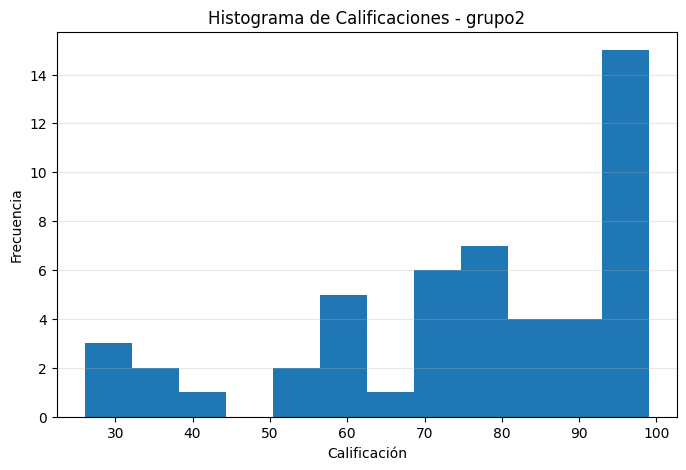

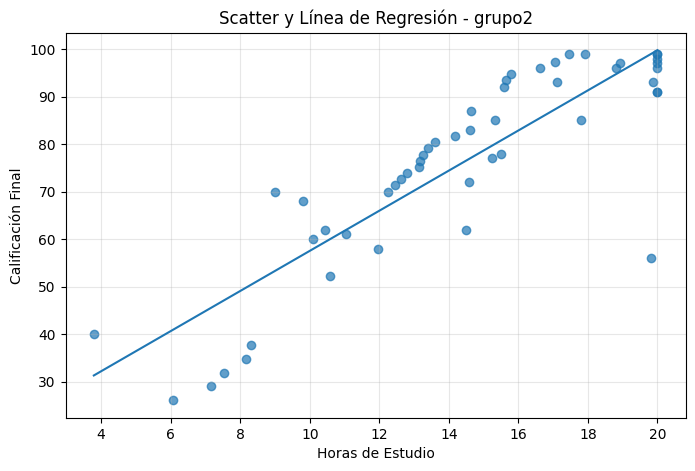


=== Resultados para grupo2 ===
Pendiente (slope): 4.2227
Intercepto (const): 15.3075
R^2 (sklearn): 0.7430
Coef. correlación Pearson r: 0.8620 (p = 9.0777e-16)

Resumen statsmodels (para evaluar significancia):
                            OLS Regression Results                            
Dep. Variable:           Calificacion   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     138.8
Date:                Thu, 20 Nov 2025   Prob (F-statistic):           9.08e-16
Time:                        01:53:01   Log-Likelihood:                -187.90
No. Observations:                  50   AIC:                             379.8
Df Residuals:                      48   BIC:                             383.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                        

,HorasEstudio,Calificacion
0,3.79,15.0
1,6.08,26.1
2,7.17,29.0
3,7.54,31.9
4,8.18,34.8


,HorasEstudio,Calificacion
count,50.000000,50.000000
mean,14.352000,75.968000
std,4.219174,23.668867
min,3.790000,15.000000
25%,12.032500,61.000000
50%,14.600000,84.950000
75%,17.715000,94.375000
max,20.000000,99.000000



Valores faltantes por columna:
HorasEstudio    0
Calificacion    0
dtype: int64


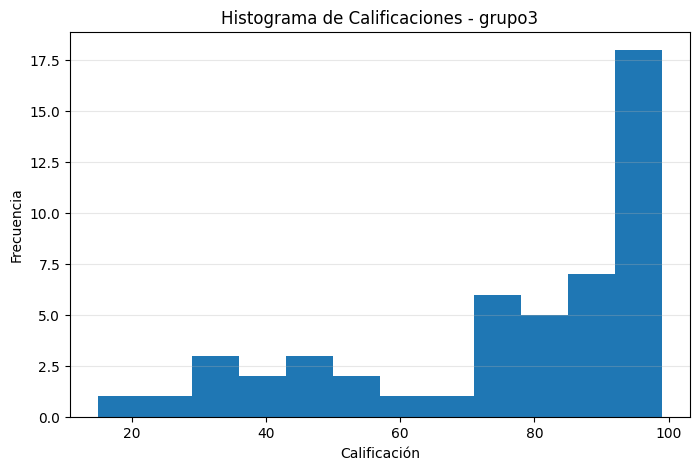

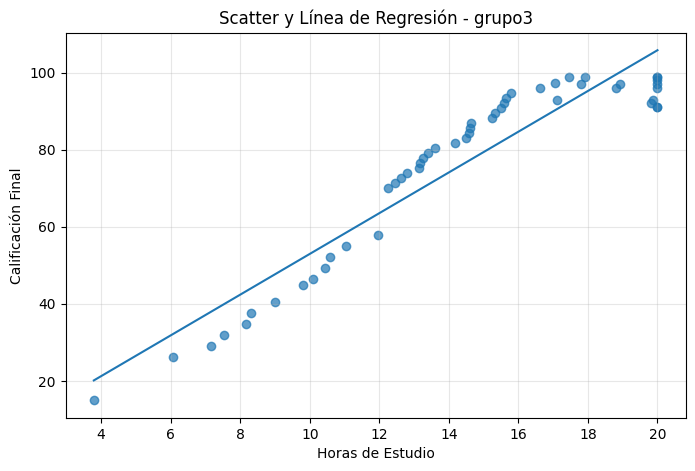


=== Resultados para grupo3 ===
Pendiente (slope): 5.2857
Intercepto (const): 0.1081
R^2 (sklearn): 0.8878
Coef. correlación Pearson r: 0.9422 (p = 1.9342e-24)

Resumen statsmodels (para evaluar significancia):
                            OLS Regression Results                            
Dep. Variable:           Calificacion   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     379.7
Date:                Thu, 20 Nov 2025   Prob (F-statistic):           1.93e-24
Time:                        01:53:01   Log-Likelihood:                -173.97
No. Observations:                  50   AIC:                             351.9
Df Residuals:                      48   BIC:                             355.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         

In [55]:
resultados = {}
for fname, df in dfs.items():
    nombre = fname.replace('.csv','')
    explorar_df(df, nombre=nombre)
    histograma_calificaciones(df, nombre=nombre)
    res_sklearn = ajustar_regresion_sklearn(df)
    res_sm = ajustar_regresion_statsmodels(df)
    graficar_scatter_regresion(df, res_sklearn, nombre=nombre)
    resumen_resultados(nombre, res_sklearn, res_sm)
    resultados[nombre] = {'df': df, 'sklearn': res_sklearn, 'statsmodels': res_sm}


In [56]:
print("\n--- Comparación rápida entre grupos ---")
for nombre, res in resultados.items():
    print(f"{nombre}: pendiente={res['sklearn']['pendiente']:.4f}, R2={res['sklearn']['r2']:.4f}, r={res['sklearn']['r']:.4f}, p(r)={res['sklearn']['p_r']:.4e}")



--- Comparación rápida entre grupos ---
grupo1: pendiente=-0.1061, R2=0.0033, r=-0.0571, p(r)=6.9351e-01
grupo2: pendiente=4.2227, R2=0.7430, r=0.8620, p(r)=9.0777e-16
grupo3: pendiente=5.2857, R2=0.8878, r=0.9422, p(r)=1.9342e-24


In [57]:
coef_df = []
for nombre, res in resultados.items():
    coef_df.append({
        'grupo': nombre,
        'pendiente': res['sklearn']['pendiente'],
        'intercepto': res['sklearn']['intercepto'],
        'r2': res['sklearn']['r2'],
        'pearson_r': res['sklearn']['r'],
        'pearson_pvalue': res['sklearn']['p_r']
    })
coef_df = pd.DataFrame(coef_df)
coef_df.to_csv("resultados_coeficientes.csv", index=False)
print("\nCoeficientes guardados en resultados_coeficientes.csv")
display(coef_df)


Coeficientes guardados en resultados_coeficientes.csv


,grupo,pendiente,intercepto,r2,pearson_r,pearson_pvalue
0,grupo1,-0.106082,85.310682,0.003264,-0.057133,6.935088e-01
1,grupo2,4.222719,15.307542,0.743025,0.861989,9.077714e-16
2,grupo3,5.285671,0.108051,0.887769,0.942215,1.934152e-24


**Grupo 1:**

***¿Explicar cuál es la interpretación del coeficiente de regresión en términos de la relación entre el tiempo de estudio y las calificaciones finales?***

La pendiente negativa indica que, por cada hora adicional de estudio, la calificación disminuiría aproximadamente 0.106 puntos.
Esta relación sugiere ausencia de una relación, las horas de estudio no explican el rendimiento en este grupo.

***¿Cómo se interpreta el coeficiente de correlación en términos de la fuerza y dirección de la relación entre las variables?***

El valor r = 0.0571 indica una correlación prácticamente nula, muy cercana a cero.
No existe relación lineal entre horas de estudio y calificación.

***¿El modelo de regresión lineal es estadísticamente significativo?***
No.
El valor p = 0.69351 es muchísimo mayor que 0.05, lo que significa que la pendiente no es estadísticamente significativa.
La regresión no tiene validez para este conjunto.

***¿Qué tan confiable es el modelo de regresión para predecir las calificaciones finales de los estudiantes basado en el tiempo de estudio?***

Muy baja.
El R² = 0.003264 significa que el modelo solo explica el 0.3% de la variabilidad en las calificaciones, prácticamente nada.
Este modelo no sirve para predecir calificaciones en este grupo.


**Grupo 2**

***¿Explicar cuál es la interpretación del coeficiente de regresión en términos de la relación entre el tiempo de estudio y las calificaciones finales?***

La pendiente indica que por cada hora adicional de estudio, la calificación aumenta en promedio 4.22 puntos.
Esto refleja una relación positiva fuerte: estudiar más se asocia con mejores calificaciones.

***¿Cómo se interpreta el coeficiente de correlación en términos de la fuerza y dirección de la relación entre las variables?***

El valor r = 0.8620 indica una correlación positiva fuerte.
Existe una relación lineal clara entre horas de estudio y calificaciones: a medida que aumentan las horas, las calificaciones tienden a subir.

***¿El modelo de regresión lineal es estadísticamente significativo?***

Sí.
El valor p = 9.07 × 10⁻¹⁶ es extremadamente pequeño (mucho menor a 0.05), lo que confirma que la pendiente es estadísticamente significativa.

***¿Qué tan confiable es el modelo de regresión para predecir las calificaciones finales de los estudiantes basado en el tiempo de estudio?***

Alta.
Con un R² de 0.743, el modelo explica el 74.3% de la variabilidad de las calificaciones.
Esto sugiere que las horas de estudio son un muy buen predictor del rendimiento académico en este grupo.

**Grupo 3**

***¿Explicar cuál es la interpretación del coeficiente de regresión en términos de la relación entre el tiempo de estudio y las calificaciones finales?***

La pendiente indica que por cada hora adicional de estudio, la calificación aumenta en promedio 5.29 puntos.
Es una relación extremadamente fuerte y positiva.

***¿Cómo se interpreta el coeficiente de correlación en términos de la fuerza y dirección de la relación entre las variables?***

El valor r = 0.9422 indica una correlación positiva muy fuerte.
Las horas de estudio explican de manera muy clara las diferencias en calificaciones.

***¿El modelo de regresión lineal es estadísticamente significativo?***

Sí.
El valor p es 1.93 × 10⁻²⁴, prácticamente cero, por lo que la relación es altamente significativa.

***¿Qué tan confiable es el modelo de regresión para predecir las calificaciones finales de los estudiantes basado en el tiempo de estudio?***

Muy alta.
El R² = 0.8878 indica que el modelo explica casi el 89% de la variabilidad en las calificaciones.
Este modelo es excelente para predecir rendimiento académico.
